In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

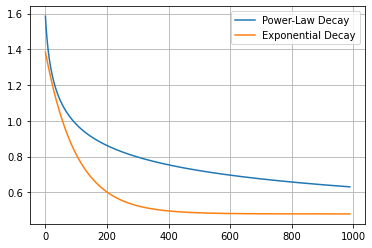

In [3]:
x = np.arange(0.1, 10, 0.01)

def power_law(x):
    return x ** (-0.2)

def exp_law(x):
    return np.exp(-x) + power_law(0.1) - np.exp(0.1)

plt.plot(power_law(x), label = "Power-Law Decay")
plt.plot(exp_law(x), label = "Exponential Decay")
plt.grid(True)
plt.legend()
plt.show()

In [44]:
with open('ham_record.pickle', 'rb') as handle:
    ham_dict = pickle.load(handle)

with open('sqp_record.pickle', 'rb') as handle:
    sqp_dict = pickle.load(handle)

In [17]:
gss_solution = ham_dict[(0.55, 0.5)].v_guess
ham_solution = ham_dict[(0.55, 0.5)].solution

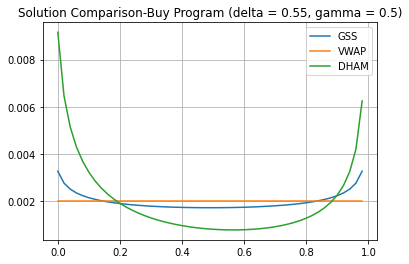

In [23]:
plt.plot(np.arange(0, 1, 0.02), gss_solution, label = "GSS")
plt.plot(np.arange(0, 1, 0.02), np.repeat(0.002, 50), label = "VWAP")
plt.plot(np.arange(0, 1, 0.02), ham_solution, label = "DHAM")
plt.grid(True)
plt.legend()
plt.title("Solution Comparison-Buy Program (delta = 0.55, gamma = 0.5)")
plt.show()

In [32]:
ham_dict[(0.55, 0.45)].expect_cost_compute(np.repeat(0.002, 50)) * 500

0.03343631999801097

In [31]:
ham_dict[(0.55, 0.45)].expect_cost_compute(gss_solution) * 500

0.032896122965360125

In [30]:
ham_dict[(0.55, 0.45)].expect_cost_compute(ham_solution) * 500

0.0302233741383852

In [67]:
method_list = ["VWAP", "GSS", "DHAM", "SQP"]
series_list = []

In [36]:
ham_dict.keys()

dict_keys([(0.55, 0.45), (0.55, 0.5), (0.55, 0.55), (0.6000000000000001, 0.45), (0.6000000000000001, 0.5), (0.6000000000000001, 0.55), (0.6500000000000001, 0.45), (0.6500000000000001, 0.5), (0.6500000000000001, 0.55), (0.7000000000000002, 0.45), (0.7000000000000002, 0.5), (0.7000000000000002, 0.55), (0.7500000000000002, 0.45), (0.7500000000000002, 0.5), (0.7500000000000002, 0.55), (0.8000000000000003, 0.45), (0.8000000000000003, 0.5), (0.8000000000000003, 0.55), (0.8500000000000003, 0.45), (0.8500000000000003, 0.5), (0.8500000000000003, 0.55), (0.9000000000000004, 0.45), (0.9000000000000004, 0.5), (0.9000000000000004, 0.55), (0.9500000000000004, 0.45), (0.9500000000000004, 0.5), (0.9500000000000004, 0.55)])

In [68]:
for method in method_list:
    series_name = f"{method}_45"
    local_list = []
    for (delta, gamma) in ham_dict:
        if gamma == 0.45:
            if method == "VWAP":
                result = ham_dict[(delta, gamma)].expect_cost_compute(np.repeat(0.002, 50)) * 500
            elif method == "GSS":
                result = ham_dict[(delta, gamma)].expect_cost_compute(ham_dict[(delta, gamma)].v_guess) * 500
            elif method == "DHAM":
                result = ham_dict[(delta, gamma)].expect_cost_compute(ham_dict[(delta, gamma)].solution) * 500
            elif method == "SQP":
                result = sqp_dict[(delta, gamma)].fun
            local_list.append(result)
    series_list.append(pd.Series(local_list, name = series_name))

In [69]:
for method in method_list:
    series_name = f"{method}_50"
    local_list = []
    for (delta, gamma) in ham_dict:
        if gamma == 0.50:
            if method == "VWAP":
                result = ham_dict[(delta, gamma)].expect_cost_compute(np.repeat(0.002, 50)) * 500
            elif method == "GSS":
                result = ham_dict[(delta, gamma)].expect_cost_compute(ham_dict[(delta, gamma)].v_guess) * 500
            elif method == "DHAM":
                result = ham_dict[(delta, gamma)].expect_cost_compute(ham_dict[(delta, gamma)].solution) * 500
            elif method == "SQP":
                result = sqp_dict[(delta, gamma)].fun
            local_list.append(result)
    series_list.append(pd.Series(local_list, name = series_name))

In [70]:
for method in method_list:
    series_name = f"{method}_55"
    local_list = []
    for (delta, gamma) in ham_dict:
        if gamma == 0.55:
            if method == "VWAP":
                result = ham_dict[(delta, gamma)].expect_cost_compute(np.repeat(0.002, 50)) * 500
            elif method == "GSS":
                result = ham_dict[(delta, gamma)].expect_cost_compute(ham_dict[(delta, gamma)].v_guess) * 500
            elif method == "DHAM":
                result = ham_dict[(delta, gamma)].expect_cost_compute(ham_dict[(delta, gamma)].solution) * 500
            elif method == "SQP":
                result = sqp_dict[(delta, gamma)].fun
            local_list.append(result)
    series_list.append(pd.Series(local_list, name = series_name))

In [71]:
result_df = pd.concat(series_list, axis = 1)

In [72]:
result_df = result_df.set_index(np.arange(0.55, 1.0, 0.05))

In [53]:
result_df.to_csv("solution_expected_cost.csv")

In [10]:
def impact_f(x, delta):
    return np.sign(x) * np.abs(x) ** delta

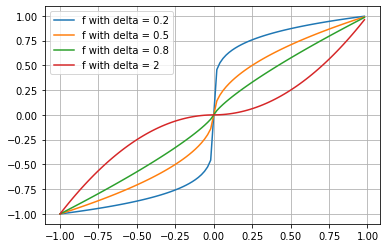

In [15]:
for delta in [0.2, 0.5, 0.8, 2]:
    x = np.arange(-1, 1, 0.02)
    plt.plot(x, impact_f(x, delta), label = f"f with delta = {delta}")
plt.grid(True)
plt.legend()
plt.show()

In [73]:
result_df

,VWAP_45,GSS_45,DHAM_45,SQP_45,VWAP_50,GSS_50,DHAM_50,SQP_50,VWAP_55,GSS_55,DHAM_55,SQP_55
0.55,0.033436,0.032840,0.030027,0.010136,0.034322,0.033788,0.031779,0.026045,0.035779,0.035317,0.034081,0.028617
0.60,0.024506,0.024069,0.022865,0.012825,0.025155,0.024765,0.023877,0.024034,0.026223,0.025886,0.025308,0.026018
0.65,0.017961,0.017642,0.017117,0.020533,0.018436,0.018153,0.017761,0.021998,0.019219,0.018975,0.018715,0.023502
0.70,0.013164,0.012933,0.012701,0.018944,0.013512,0.013307,0.013134,0.019945,0.014086,0.013910,0.013796,0.021165
0.75,0.009648,0.009481,0.009379,0.017311,0.009903,0.009755,0.009680,0.017994,0.010324,0.010197,0.010149,0.018986
0.80,0.007071,0.006952,0.006907,0.015618,0.007258,0.007152,0.007120,0.016184,0.007566,0.007476,0.007457,0.017024
0.85,0.005182,0.005097,0.005078,0.014038,0.005320,0.005244,0.005231,0.014530,0.005545,0.005482,0.005475,0.015213
0.90,0.003798,0.003738,0.003730,0.012611,0.003899,0.003846,0.003841,0.012987,0.004064,0.004019,0.004018,0.013583
0.95,0.002784,0.002742,0.002739,0.011270,0.002857,0.002820,0.002819,0.011596,0.002979,0.002947,0.002947,0.012121


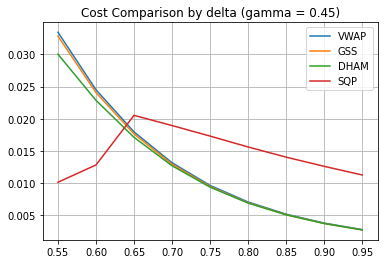

In [81]:
plt.plot(result_df.VWAP_45, label = "VWAP")
plt.plot(result_df.GSS_45, label = "GSS")
plt.plot(result_df.DHAM_45, label = "DHAM")
plt.plot(result_df.SQP_45, label = "SQP")
plt.grid(True)
plt.legend()
plt.title("Cost Comparison by delta (gamma = 0.45)")
plt.show()

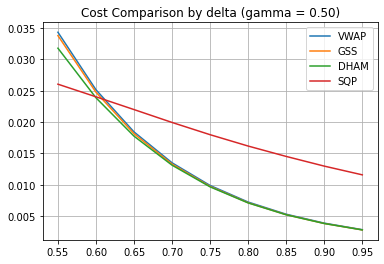

In [82]:
plt.plot(result_df.VWAP_50, label = "VWAP")
plt.plot(result_df.GSS_50, label = "GSS")
plt.plot(result_df.DHAM_50, label = "DHAM")
plt.plot(result_df.SQP_50, label = "SQP")
plt.grid(True)
plt.legend()
plt.title("Cost Comparison by delta (gamma = 0.50)")
plt.show()

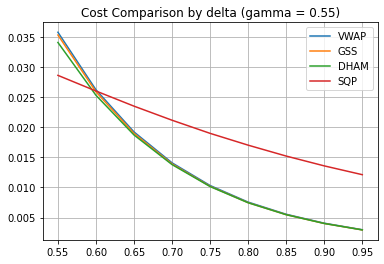

In [83]:
plt.plot(result_df.VWAP_55, label = "VWAP")
plt.plot(result_df.GSS_55, label = "GSS")
plt.plot(result_df.DHAM_55, label = "DHAM")
plt.plot(result_df.SQP_55, label = "SQP")
plt.grid(True)
plt.legend()
plt.title("Cost Comparison by delta (gamma = 0.55)")
plt.show()